In [1]:
%pip install --quiet --upgrade pip numpy pandas matplotlib
#  seaborn scikit-learn statsmodels xgboost lightgbm catboost optuna 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
FILE = "./../data/août 2023/2025-03-31T20:50:08.359657.pkl"

In [4]:
df = pd.read_pickle(FILE)
df = pd.DataFrame(df[::-1])
df.head()

,draw_date,numbers,bonus,type
0,2023-08-01,"[62, 87, 30, 3, 52]",None,FORTUNE_18H
1,2023-08-01,"[30, 31, 13, 20, 48]",None,FORTUNE_14H
2,2023-08-01,"[15, 29, 80, 77, 17]",None,FORTUNE_11H
3,2023-08-02,"[90, 68, 4, 2, 75]",None,STAR_18H
4,2023-08-02,"[69, 65, 33, 44, 2]",None,STAR_14H


In [5]:
def process_dataframe(df):
    # Extract the hour from the 'type' column
    df['hour'] = df['type'].str.extract(r'_(\d{2})H').astype(int)

    # Combine 'draw_date' and 'hour' to create a datetime column
    df['datetime'] = pd.to_datetime(df['draw_date']) + pd.to_timedelta(df['hour'], unit='h')

    # Drop the temporary 'hour' column if no longer needed
    df.drop(columns=['hour'], inplace=True)

    # Separate the 'type' column into two new columns: 'category' and 'hour_label'
    df[['category', 'hour_label']] = df['type'].str.split('_', expand=True).iloc[:, [0, -1]]

    # Sort the dataframe by 'datetime' within each 'category'
    df = df.sort_values(by=['datetime', 'category']).reset_index(drop=True)
    # Adjust 'numbers' and set 'bonus' if the length of 'numbers' is 6
    df['bonus'] = df['numbers'].apply(lambda x: x.pop() if len(x) == 6 else None)
    numbers_df = pd.DataFrame(df['numbers'].tolist(), columns=['num1', 'num2', 'num3', 'num4', 'num5'])
    df = pd.concat([df, numbers_df], axis=1)
    df = df[['datetime', 'category', 'num1', 'num2', 'num3', 'num4', 'num5', 'bonus']]
    return df
# Example usage:
df = process_dataframe(df)
df.head(10)

,datetime,category,num1,num2,num3,num4,num5,bonus
0,2023-08-01 11:00:00,FORTUNE,15,29,80,77,17,NaN
1,2023-08-01 14:00:00,FORTUNE,30,31,13,20,48,NaN
2,2023-08-01 18:00:00,FORTUNE,62,87,30,3,52,NaN
3,2023-08-02 11:00:00,STAR,65,74,17,42,34,NaN
4,2023-08-02 14:00:00,STAR,69,65,33,44,2,NaN
5,2023-08-02 18:00:00,STAR,90,68,4,2,75,NaN
6,2023-08-03 11:00:00,FORTUNE,29,77,53,71,23,NaN
7,2023-08-03 14:00:00,FORTUNE,55,37,28,44,8,NaN
8,2023-08-03 18:00:00,FORTUNE,74,50,19,13,83,NaN
9,2023-08-04 11:00:00,FORTUNE,23,88,79,60,19,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  93 non-null     datetime64[ns]
 1   category  93 non-null     object        
 2   num1      93 non-null     int64         
 3   num2      93 non-null     int64         
 4   num3      93 non-null     int64         
 5   num4      93 non-null     int64         
 6   num5      93 non-null     int64         
 7   bonus     12 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 5.9+ KB


Basic Statistics:
                  datetime       num1       num2      num3       num4  \
count                   93  93.000000  93.000000  93.00000  93.000000   
mean   2023-08-16 14:20:00  47.763441  47.387097  40.27957  43.924731   
min    2023-08-01 11:00:00   2.000000   1.000000   2.00000   1.000000   
25%    2023-08-08 18:00:00  24.000000  22.000000  17.00000  24.000000   
50%    2023-08-16 14:00:00  53.000000  50.000000  30.00000  42.000000   
75%    2023-08-24 11:00:00  69.000000  73.000000  65.00000  64.000000   
max    2023-08-31 18:00:00  90.000000  89.000000  90.00000  90.000000   
std                    NaN  25.744733  27.174169  28.11520  25.023570   

            num5      bonus  
count  93.000000  12.000000  
mean   42.215054  45.083333  
min     2.000000   2.000000  
25%    20.000000  32.250000  
50%    44.000000  48.500000  
75%    63.000000  57.500000  
max    90.000000  81.000000  
std    25.555077  23.070872  

Missing Values:
datetime     0
category     0
num1   

<Figure size 1200x600 with 0 Axes>

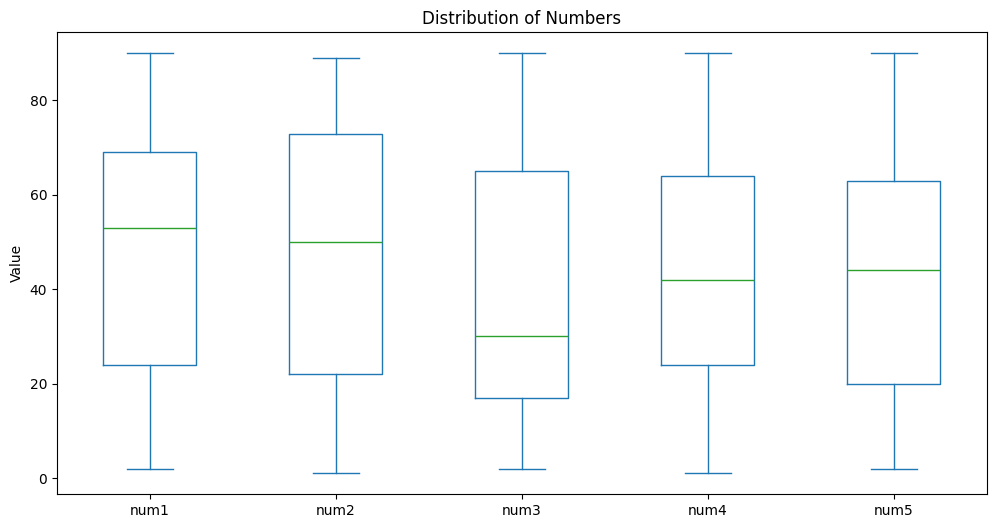

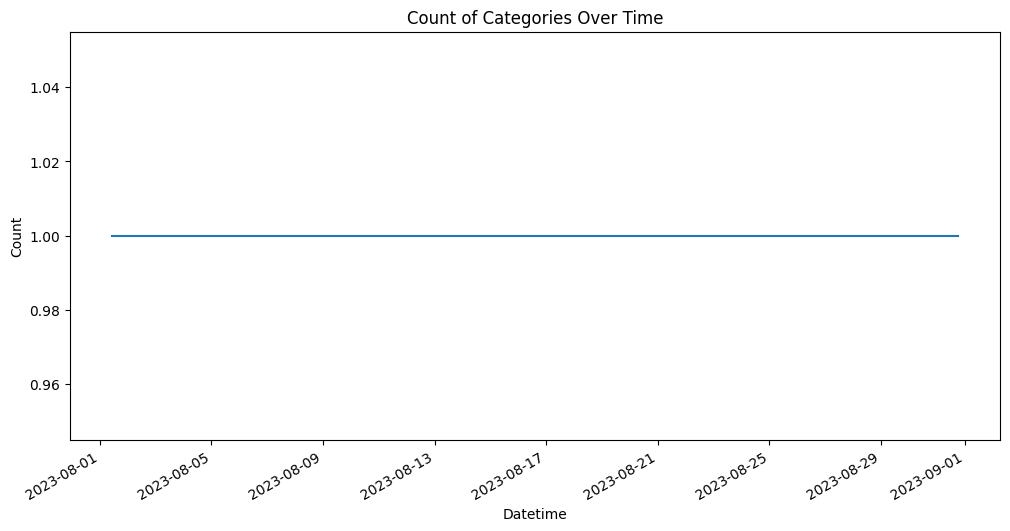

In [7]:
# Display basic statistics
print("Basic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of categories
print("\nCategory Distribution:")
print(df['category'].value_counts())

# Plot the distribution of numbers
plt.figure(figsize=(12, 6))
df[['num1', 'num2', 'num3', 'num4', 'num5']].plot(kind='box', figsize=(12, 6))
plt.title("Distribution of Numbers")
plt.ylabel("Value")
plt.show()

# Plot the count of categories over time
plt.figure(figsize=(12, 6))
df.groupby('datetime')['category'].count().plot()
plt.title("Count of Categories Over Time")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.show()

In [8]:
%ls -R ./../data

./../data:
'août 2023'/      'février 2025'/  'juin 2023'/  'novembre 2023'/
'août 2024'/       final_df.pkl    'juin 2024'/  'novembre 2024'/
'avril 2024'/     'janvier 2024'/  'mai 2023'/   'octobre 2023'/
'décembre 2023'/  'janvier 2025'/  'mai 2024'/   'octobre 2024'/
'décembre 2024'/  'juillet 2023'/  'mars 2024'/  'septembre 2023'/
'février 2024'/   'juillet 2024'/  'mars 2025'/  'septembre 2024'/

'./../data/août 2023':
2025-03-31T20:50:08.359657.pkl

'./../data/août 2024':
2025-03-31T20:26:06.904594.pkl

'./../data/avril 2024':
2025-03-31T20:34:06.674047.pkl

'./../data/décembre 2023':
2025-03-31T20:42:06.345296.pkl

'./../data/décembre 2024':
2025-03-31T20:18:06.856996.pkl

'./../data/février 2024':
2025-03-31T20:38:07.758165.pkl

'./../data/février 2025':
2025-03-31T20:14:08.242076.pkl

'./../data/janvier 2024':
2025-03-31T20:40:07.268148.pkl

'./../data/janvier 2025':
2025-03-31T20:16:06.795053.pkl

'./../data/juillet 2023':
2025-03-31T20:52:06.620573.pkl

'./../data/juillet

In [9]:
import os
from datetime import datetime

def get_last_file(base_path):
    last_file = None
    last_timestamp = None

    for root, dirs, files in os.walk(base_path):
        for file in files:
            try:
                # Extract the timestamp from the filename
                timestamp_str = file.split('.')[0]
                timestamp = datetime.fromisoformat(timestamp_str)

                # Update the last file if this one is more recent
                if last_timestamp is None or timestamp > last_timestamp:
                    last_file = os.path.join(root, file)
                    last_timestamp = timestamp
            except ValueError:
                # Skip files that don't have a valid ISO timestamp
                continue

    return last_file

# Example usage
base_path = './../data/mars 2025'
last_file = get_last_file(base_path)
print("Last file:", last_file)

Last file: ./../data/mars 2025/2025-03-31T20:12:07.197136.pkl


In [10]:
MONTH = [
    "janvier",
    "février",
    "mars",
    "avril",
    "mai",
    "juin",
    "juillet",
    "août",
    "septembre",
    "octobre",
    "novembre",
    "décembre",
]
YEARS = ["2023", "2024", "2025"]

for year in YEARS:
    for month in MONTH:
        path = f"./../data/{month} {year}"
        last_file = get_last_file(path)
        if last_file:
            # print("Last file:", last_file)
            df = pd.read_pickle(last_file)
            df = pd.DataFrame(df[::-1])
            # print(df.head())
            df = process_dataframe(df)
            if 'final_df' in locals():
                final_df = pd.concat([final_df, df], ignore_index=True)
            else:
                final_df = df
# Save the final DataFrame to a pickle file
final_df.to_pickle("./../data/final_df.pkl")
final_df.shape

/tmp/ipykernel_921248/819508612.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, df], ignore_index=True)
/tmp/ipykernel_921248/819508612.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, df], ignore_index=True)


(2369, 8)

In [11]:
final_df.head(10)

,datetime,category,num1,num2,num3,num4,num5,bonus
0,2023-05-13 14:00:00,STAR,47,64,39,66,26,NaN
1,2023-05-13 18:00:00,STAR,12,54,62,38,53,NaN
2,2023-05-14 14:00:00,STAR,38,21,40,82,52,NaN
3,2023-05-14 18:00:00,STAR,6,55,54,25,80,NaN
4,2023-05-15 14:00:00,FORTUNE,53,51,19,36,49,43.0
5,2023-05-15 18:00:00,FORTUNE,50,61,20,54,4,58.0
6,2023-05-16 14:00:00,FORTUNE,10,67,9,37,18,NaN
7,2023-05-16 18:00:00,FORTUNE,71,84,5,56,70,NaN
8,2023-05-17 14:00:00,STAR,87,46,78,29,38,NaN
9,2023-05-17 18:00:00,STAR,79,57,24,26,65,NaN
